In [91]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [104]:
df=pd.read_html('Trade_Map_-_Bilateral_trade_between_Dominican_Republic_and_Haiti.xls',header=0)
df1=df[3]
df1.head(2)

,Product code,Product label,Dominican Republic's exports to Haiti,Dominican Republic's exports to Haiti.1,Dominican Republic's exports to Haiti.2,Dominican Republic's exports to Haiti.3,Dominican Republic's exports to Haiti.4,Dominican Republic's exports to Haiti.5,Dominican Republic's exports to Haiti.6,Dominican Republic's exports to Haiti.7,...,Dominican Republic's exports to world.11,Dominican Republic's exports to world.12,Dominican Republic's exports to world.13,Dominican Republic's exports to world.14,Dominican Republic's exports to world.15,Dominican Republic's exports to world.16,Dominican Republic's exports to world.17,Dominican Republic's exports to world.18,Dominican Republic's exports to world.19,Dominican Republic's exports to world.20
0,Product code,Product label,Value in 2003,Value in 2004,Value in 2005,Value in 2006,Value in 2007,Value in 2008,Value in 2009,Value in 2010,...,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,Value in 2020,Value in 2021,Value in 2022
1,'TOTAL,All products,282058,268466,375471,698126,555472,1189286,680345,801953,...,7960984,9927796,8384108,9785186,10224662,9395611,10078188,9848863,11831534,12390307


In [105]:
cols=['Code','Label']
cols.extend([str(i)[-4::] for i in df1.iloc[0,:]][2:])
df1.columns=cols
df1.head(2)



,Code,Label,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Product code,Product label,Value in 2003,Value in 2004,Value in 2005,Value in 2006,Value in 2007,Value in 2008,Value in 2009,Value in 2010,...,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,Value in 2020,Value in 2021,Value in 2022
1,'TOTAL,All products,282058,268466,375471,698126,555472,1189286,680345,801953,...,7960984,9927796,8384108,9785186,10224662,9395611,10078188,9848863,11831534,12390307


In [106]:
df2=df1[['Code','Label','2022']]
df2.columns=['Code','Label','Export_to_HT','HT_Imports_World','Export_to_World']
df2=df2.loc[1:,:]
df2.head(4)

,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World
1,'TOTAL,All products,1040035,4240236,12390307
2,'52,Cotton,179132,184604,182238
3,'39,Plastics and articles thereof,134623,229412,703696
4,'61,"Articles of apparel and clothing accessories, ...",99256,149341,545364


In [107]:
# convert data to float
df2['Export_to_HT']=np.float64(df2['Export_to_HT'])
df2['Export_to_World']=np.float64(df2['Export_to_World'])
df2['HT_Imports_World']=np.float64(df2['HT_Imports_World'])
df2=df2.reset_index()
df2.head(5)

,index,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World
0,1,'TOTAL,All products,1040035.0,4240236.0,12390307.0
1,2,'52,Cotton,179132.0,184604.0,182238.0
2,3,'39,Plastics and articles thereof,134623.0,229412.0,703696.0
3,4,'61,"Articles of apparel and clothing accessories, ...",99256.0,149341.0,545364.0
4,5,'15,"Animal, vegetable or microbial fats and oils a...",84768.0,210804.0,97264.0


In [108]:
# Remove the row of total
df2=df2.iloc[1:,:]
df2.head(4)

,index,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World
1,2,'52,Cotton,179132.0,184604.0,182238.0
2,3,'39,Plastics and articles thereof,134623.0,229412.0,703696.0
3,4,'61,"Articles of apparel and clothing accessories, ...",99256.0,149341.0,545364.0
4,5,'15,"Animal, vegetable or microbial fats and oils a...",84768.0,210804.0,97264.0


In [109]:
# remove rows of products where export to Haiti is zero
df2=df2[df2['Export_to_HT']!=np.float64(0)]
df2=df2.reset_index()
df2.head(3)

,level_0,index,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World
0,1,2,'52,Cotton,179132.0,184604.0,182238.0
1,2,3,'39,Plastics and articles thereof,134623.0,229412.0,703696.0
2,3,4,'61,"Articles of apparel and clothing accessories, ...",99256.0,149341.0,545364.0


In [110]:
df2['Export_to_HT'].shape,(df2['Export_to_World']).shape

((86,), (86,))

In [111]:
# share export to Haiti
share_export=[]
for i in range(df2.shape[0]):
    share_export.append((df2.Export_to_HT[i])/(df2.Export_to_World[i])*100)

# share import from Dominican Republic
share_import=[]
for i in range(df2.shape[0]):
    share_import.append((df2.Export_to_HT[i])/(df2.HT_Imports_World[i])*100)


df2['Share_Export_to_HT']=share_export
df2['Share_Import_from_RD']=share_import


In [112]:
df2=df2.iloc[:,2:]
df2.head()

,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World,Share_Export_to_HT,Share_Import_from_RD
0,'52,Cotton,179132.0,184604.0,182238.0,98.295635,97.035817
1,'39,Plastics and articles thereof,134623.0,229412.0,703696.0,19.130846,58.681760
2,'61,"Articles of apparel and clothing accessories, ...",99256.0,149341.0,545364.0,18.199955,66.462659
3,'15,"Animal, vegetable or microbial fats and oils a...",84768.0,210804.0,97264.0,87.152492,40.211761
4,'11,Products of the milling industry; malt; starch...,77238.0,97105.0,94229.0,81.968396,79.540703


In [113]:
dd1=df2[df2['Share_Export_to_HT']>=50]
dd1=dd1.sort_values('Share_Export_to_HT',ascending=True)
dd1=dd1.reset_index()
dd1=dd1.iloc[:,2:]


In [114]:
dd2=df2[df2['Share_Import_from_RD']>=50]
dd2=dd2.sort_values('Share_Import_from_RD',ascending=True)
dd2=dd2.reset_index()
dd2=dd2.iloc[:,2:]



In [115]:
pd.merge(dd1,dd2).Label

0    Salt; sulphur; earths and stone; plastering ma...
1    Tanning or dyeing extracts; tannins and their ...
2    Musical instruments; parts and accessories of ...
3                Photographic or cinematographic goods
4    Products of the milling industry; malt; starch...
5                            Zinc and articles thereof
6                             Tin and articles thereof
7                                               Cotton
Name: Label, dtype: object

C:\Users\rcadet\AppData\Local\Temp\ipykernel_7872\4143397854.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


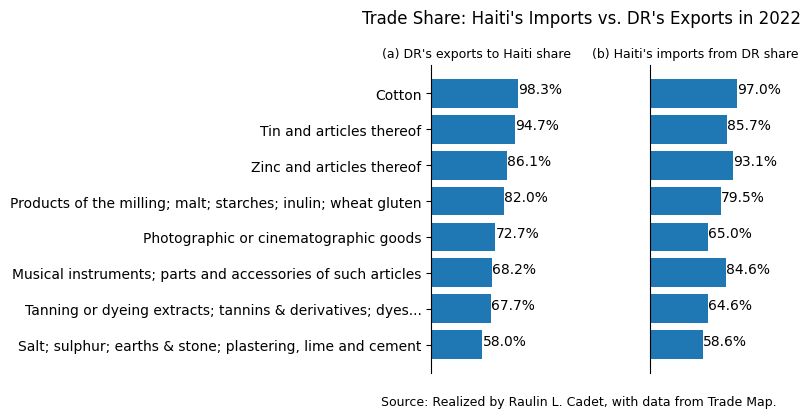

In [163]:
# Selecct 
dd3=pd.merge(dd1,dd2)
dd3=dd3.sort_values('Share_Export_to_HT')
dd3=dd3.reset_index()

dd3.Label=['Salt; sulphur; earths & stone; plastering, lime and cement',
 'Tanning or dyeing extracts; tannins & derivatives; dyes...', #pigments and other colouring ...',
 'Musical instruments; parts and accessories of such articles',
 'Photographic or cinematographic goods',
 'Products of the milling; malt; starches; inulin; wheat gluten',
 'Zinc and articles thereof',
 'Tin and articles thereof',
 'Cotton']

# fig,ax=plt.subplots(1,2,figsize=(6,6))
# fig,ax=plt.subplots(1,2,figsize=(4,4))
fig,ax=plt.subplots(1,2,figsize=(4,4))
ax[0].barh(dd3.Label,dd3.Share_Export_to_HT)
for i in range(len(dd3)):
    ax[0].text(x=dd3.Share_Export_to_HT[i],y=dd3.index[i],s=str(round(dd3.Share_Export_to_HT[i],1))+'%',color='black')
    i=i+1
ax[0].spines[['right', 'top','bottom']].set_visible(False) 
ax[0].axes.get_xaxis().set_ticks([])
ax[0].set_title("(a) DR's exports to Haiti share",fontsize=9)

ax[1].barh(dd3.Label,dd3.Share_Import_from_RD)
for i in range(len(dd3)):
    ax[1].text(x=dd3.Share_Import_from_RD[i],y=dd3.index[i],s=str(round(dd3.Share_Import_from_RD[i],1))+'%',color='black')
    i=i+1
ax[1].spines[['right', 'top','bottom']].set_visible(False) 
ax[1].axes.get_yaxis().set_ticks([])
ax[1].axes.get_xaxis().set_ticks([])
ax[1].set_title("(b) Haiti's imports from DR share",fontsize=9)
# ax[0].xticks(visible=False)
fig.suptitle("Trade Share: Haiti's Imports vs. DR's Exports in 2022",y=1.02)
fig.text(0, 0.03, 'Source: Realized by Raulin L. Cadet, with data from Trade Map.', ha='left',fontsize=9)

plt.subplots_adjust(wspace=1.4)
plt.tight_layout()

In [117]:
df2.Export_to_HT.sum()*1000,dd3.Export_to_HT.sum()*1000, (dd3.Export_to_HT.sum()*1000)/(df2.Export_to_HT.sum()*1000)*100

(1040033000.0, 328317000.0, 31.567940632653002)